In [61]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, '../')
from train import load_train_outputs

In [10]:
darknet_history = load_train_outputs('./log/darknet19/training/')['history']
v1_history = load_train_outputs('./log/YOLOv8cls-version-1/training/')['history']
v2_history = load_train_outputs('./log/YOLOv8cls-version-2/training/')['history']
v3_history = load_train_outputs('./log/YOLOv8cls-version-3/training/')['history']
v4_history = load_train_outputs('./log/YOLOv8cls-version-4/training/')['history']
yolov8_history = load_train_outputs('./log/YOLOv8cls-version-5/training/')['history']

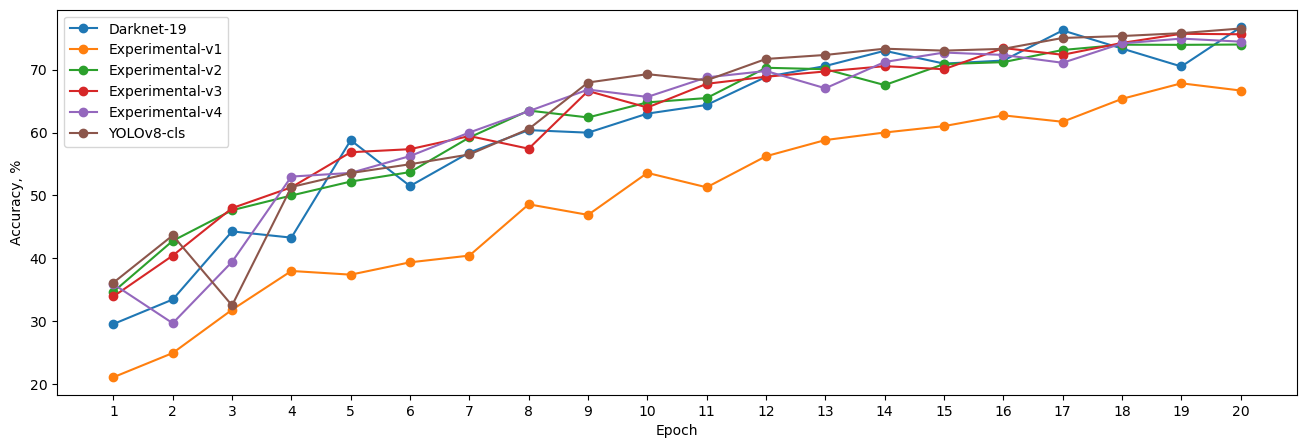

In [93]:
fig, ax = plt.subplots(1,1, figsize=(16,5))
for model_name, history in [('Darknet-19', darknet_history), 
                            ('Experimental-v1', v1_history), 
                            ('Experimental-v2', v2_history), 
                            ('Experimental-v3', v3_history), 
                            ('Experimental-v4', v4_history), 
                            ('YOLOv8-cls', yolov8_history)]:
    my_plot = ax.plot(history['epoch'], history['val_accuracy'], label=model_name, marker='o')
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    plt.xticks(range(1,21))
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy, %")

In [42]:
names = []
max_values = []
at_epoch = []
for model_name, history in [('Darknet-19', darknet_history), 
                            ('Experimental-v1', v1_history), 
                            ('Experimental-v2', v2_history), 
                            ('Experimental-v3', v3_history), 
                            ('Experimental-v4', v4_history), 
                            ('YOLOv8-cls', yolov8_history)]:
    names.append(model_name)
    max_values.append(history['val_accuracy'].max())
    at_epoch.append(history.loc[history.val_accuracy == max_values[-1], 'epoch'].values[0])

Text(0, 0.5, 'Accuracy, %')

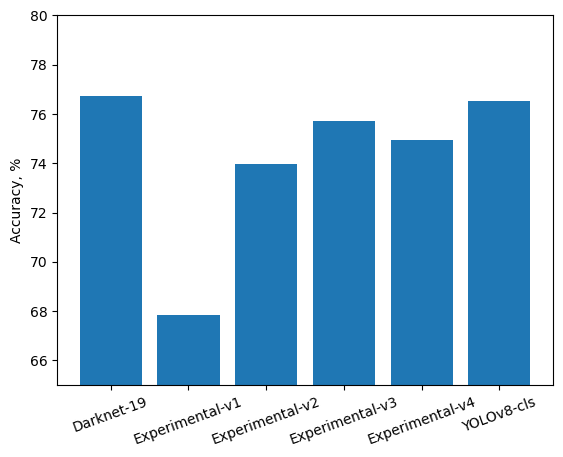

In [95]:
plt.bar(names, max_values)
plt.ylim(65, 80)
plt.xticks(rotation=20)
plt.ylabel("Accuracy, %")

In [44]:
at_epoch

[20, 19, 20, 19, 19, 20]